# 4.3 経路最適化

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## 最短路問題 (shortest path problem)
ダイクストラ法 (dijkstra's algorithm)

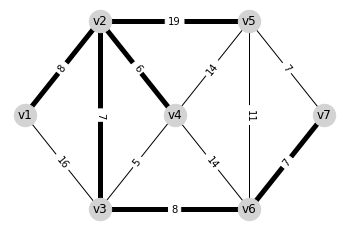

In [2]:
weighted_elist = [('v1','v2',8), ('v1','v3',16), ('v2','v3',7),
                  ('v2','v4',6), ('v2','v5',19), ('v3','v4',5),
                  ('v3','v6',8), ('v4','v5',14), ('v4','v6',14),
                  ('v5','v6',11), ('v5','v7',7), ('v6','v7',7)]
p = {'v1':(0,1), 'v2':(1,2), 'v3':(1,0), 'v4':(2,1), 'v5':(3,2),
     'v6':(3,0), 'v7':(4,1)}
G = nx.Graph()
G.add_weighted_edges_from(weighted_elist)
elbs = {(u,v):G[u][v]['weight'] for (u,v) in G.edges()}

s = 'v1'
nodes = set(G.nodes()) - {s}
T = set({})
for v in nodes:
    sp = nx.dijkstra_path(G, s, v)
    T = T.union({tuple(x) for x in np.array([sp[:-1],sp[1:]]).T})
T = list(T)

nx.draw_networkx(G, pos=p, node_color='lightgray',
                 node_size=500, width=1)
nx.draw_networkx_edges(G, pos=p, edgelist=T, width=5)
nx.draw_networkx_edge_labels(G, pos=p, edge_labels=elbs)
plt.axis('off')
plt.show()

### オイラー路 (euler trail)
一筆書きできるグラフ

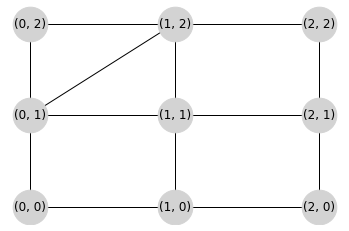

False

In [10]:
GR = nx.grid_2d_graph(3,3)
GR.add_edges_from([((0, 1), (1, 2))])
nx.draw_networkx(GR, pos={v:v for v in GR.nodes()},
                 node_color='lightgray', node_size=1200, with_labels=True)
plt.axis('off')
plt.show()
nx.is_eulerian(GR)

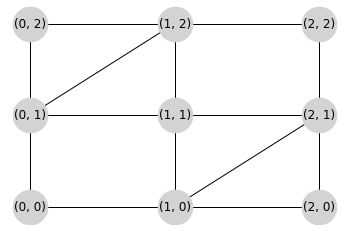

True

In [11]:
GR.add_edges_from([((1, 0), (2, 1))])
nx.draw_networkx(GR, pos={v:v for v in GR.nodes()},
                 node_color='lightgray', node_size=1200, with_labels=True)
plt.axis('off')
plt.show()
nx.is_eulerian(GR)

In [13]:
ee = nx.eulerian_circuit(GR)
for (i, j) in ee:
    print(i, end='->')

(0, 0)->(0, 1)->(1, 2)->(2, 2)->(2, 1)->(1, 1)->(1, 2)->(0, 2)->(0, 1)->(1, 1)->(1, 0)->(2, 1)->(2, 0)->(1, 0)->

### 郵便配達人問題 (chinese postman problem)

### グラフの生成

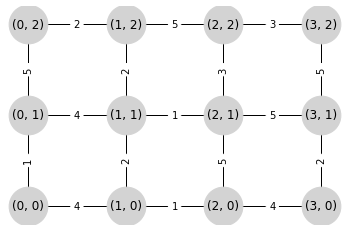

In [14]:
np.random.seed(1000)

G = nx.grid_2d_graph(4, 3)
for (u, v) in G.edges():
    G[u][v]['weight'] = np.random.randint(1, 6)
    
nx.draw_networkx(G, pos={v:v for v in G.nodes()},
                 node_color='lightgray', node_size=1500, width=1)
nx.draw_networkx_edge_labels(G,
                             edge_labels={(u,v):G[u][v]['weight'] for (u, v) in G.edges()},
                             pos={v:v for v in G.nodes()})
plt.axis('off')
plt.show()

### 最短路長の完全グラフを作成

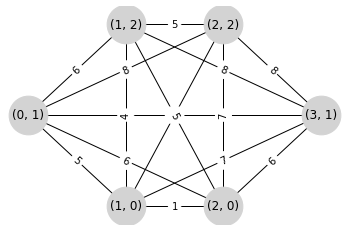

In [18]:
from itertools import combinations

# すべての奇点間の最短路の長さを計算
# dist[vodd1][vodd2]に計算されている
Vodd = [v for v in G.nodes() if G.degree(v)%2 == 1]
dist = dict(nx.all_pairs_dijkstra_path_length(G))

# 頂点がVoddの、完全グラフ作成。重みは最短路長
K = nx.Graph()
K.add_weighted_edges_from([(u,v,dist[u][v])
                              for (u,v) in combinations(Vodd, 2)])
nx.draw_networkx(K, pos={v:v for v in K.nodes()},
                 node_color='lightgray', node_size=1500, width=1)
nx.draw_networkx_edge_labels(K, pos={v:v for v in K.nodes()},
                             edge_labels={(u,v):K[u][v]['weight'] for (u,v) in K.edges()})
plt.axis('off')
plt.show()

### 重み最大マッチング

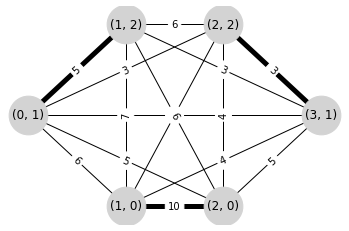

In [22]:
CK = K.copy()
wm = max(CK[u][v]['weight'] for (u, v) in CK.edges())
for (u, v) in K.edges():
    CK[u][v]['weight'] = wm - CK[u][v]['weight'] + 1

m = nx.max_weight_matching(CK, maxcardinality=True)
md = dict(m)
mm = []

for (u, v) in md.items():
    if (u, v) not in mm and (v, u) not in mm:
        mm.append((u, v))
        
nx.draw_networkx(CK, pos={v:v for v in CK.nodes()},
                 node_color='lightgray', node_size=1500, width=1)
nx.draw_networkx_edge_labels(CK, pos={v:v for v in CK.nodes()},
                             edge_labels={(u,v):CK[u][v]['weight'] for (u,v) in CK.edges()})
nx.draw_networkx_edges(CK, pos={v:v for v in CK.nodes()}, edgelist=mm, width=5)
plt.axis('off')
plt.show()

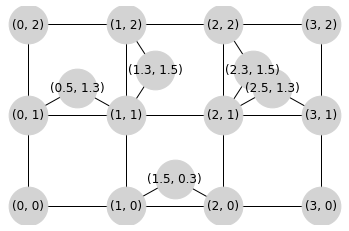

In [23]:
CG = G.copy()
for (u, v) in mm:
    dp = nx.dijkstra_path(G, u, v)
    for i in range(len(dp)-1):
        (ux, uy) = dp[i]
        (vx, vy) = dp[i+1]
        if ux == vx:
            wx = ux + 0.3
            wy = (uy + vy) / 2.0
        else:
            wx = (ux + vx) / 2.0
            wy = uy + 0.3
        CG.add_edges_from([((ux,uy), (wx,wy)), ((wx,wy), (vx,vy))])
        
nx.draw_networkx(CG, pos={v:v for v in CG.nodes()},
                 node_color='lightgray', node_size=1500, width=1)
plt.axis('off')
plt.show()

In [25]:
ec = nx.eulerian_circuit(CG)
for (i, j) in ec:
    print(i, end='->')

(0, 0)->(0, 1)->(0.5, 1.3)->(1, 1)->(1.3, 1.5)->(1, 2)->(2, 2)->(2.3, 1.5)->(2, 1)->(2.5, 1.3)->(3, 1)->(3, 2)->(2, 2)->(2, 1)->(2, 0)->(1.5, 0.3)->(1, 0)->(1, 1)->(1, 2)->(0, 2)->(0, 1)->(1, 1)->(2, 1)->(3, 1)->(3, 0)->(2, 0)->(1, 0)->

In [37]:
from pulp import *
from itertools import product

MEPS = 1.0e-10


def TSPSolveSubtourElim(G, x, y):
    n = len(G.nodes())
    nodes = list(G.nodes())
    edges = [(nodes[i], nodes[j]) for (i,j) in product(range(n), range(n)) if nodes[i] < nodes[j]]
    D = np.sqrt((x.reshape(-1,1)-x)**2 + (y.reshape(-1,1)-y)**2)

    prob = LpProblem('TSP', LpMinimize)

    x = {(u,v): LpVariable('x'+str(u)+","+str(v),
                          lowBound=0, cat='Binary') for (u,v) in edges}

    prob += lpSum(D[i, j]*x[i, j] for (i,j) in edges)
    for i in nodes:
        ss = [(j,i) for j in nodes if (j,i) in edges] + \
            [(i,j) for j in nodes if (i,j) in edges]
        prob += lpSum(x[e] for e in ss) == 2, 'Eq' + str(i)

    prob.solve()
    subtours = []
    for (i, j) in edges:
        if x[i, j].varValue > MEPS:
            subtours.append([i,j])
    G.add_edges_from(subtours)

    CC = list(nx.connected_components(G))
    while len(CC) > 1:
        for S in CC:
            prob += lpSum(x[i,j] for (i,j) in edges
                         if i in S and j in S) <= len(S) - 1
        prob.solve()

        G.remove_edges_from(subtours)
        subtours = []
        for (i, j) in edges:
            if x[i, j].varValue > MEPS:
                subtours.append([i,j])
        G.add_edges_from(subtours)
        CC = list(nx.connected_components(G))

    len_tour = 0
    for (u, v) in G.edges():
        len_tour += D[u, v]

    return len_tour

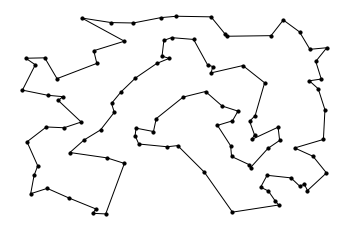

In [36]:
# n点からなるグラフの作成
n = 100
vlist = [i for i in range(n)]
Tours = nx.Graph()
Tours.add_nodes_from(vlist)

np.random.seed(1234)
x = np.random.randint(low=0, high=1000, size=n)
y = np.random.randint(low=0, high=1000, size=n)
p = {i: (x[i], y[i]) for i in range(n)}

TSPSolveSubtourElim(Tours, x, y)
nx.draw_networkx(Tours, pos=p, node_color='k', node_size=10, with_labels=False)
plt.axis('off')
plt.show()

## 最大流問題 (maximum flow problem)

In [39]:
import networkx as nx

G = nx.DiGraph()
G.add_edge(1,2,capacity=4); G.add_edge(1,3,capacity=5)
G.add_edge(2,3,capacity=2); G.add_edge(2,4,capacity=2)
G.add_edge(3,4,capacity=2); G.add_edge(3,5,capacity=3)
G.add_edge(4,5,capacity=4); G.add_edge(4,6,capacity=3)
G.add_edge(5,6,capacity=5);

val, flowdict = nx.maximum_flow(G, 1, 6)
print('maxflow: ', val)
for u, v in G.edges():
    print((u, v), ':', flowdict[u][v])

maxflow:  7
(1, 2) : 2
(1, 3) : 5
(2, 3) : 0
(2, 4) : 2
(3, 4) : 2
(3, 5) : 3
(4, 5) : 1
(4, 6) : 3
(5, 6) : 4


### 最小カット問題

In [41]:
nx.minimum_cut(G, 1, 6)

(7, ({1, 2, 3}, {4, 5, 6}))

In [42]:
G = nx.DiGraph()
G.add_node('a', demand = -8); G.add_node('b', demand = 0)
G.add_node('c', demand = -2); G.add_node('d', demand = 10)
G.add_edge('a', 'b', weight = 3, capacity = 3)
G.add_edge('a', 'c', weight = 6, capacity = 10)
G.add_edge('b', 'd', weight = 1, capacity = 6)
G.add_edge('c', 'd', weight = 4, capacity = 10)
G.add_edge('c', 'b', weight = 2, capacity = 5)

flowDict = nx.min_cost_flow(G)
print(flowDict)

{'a': {'b': 3, 'c': 5}, 'b': {'d': 6}, 'c': {'d': 4, 'b': 3}, 'd': {}}
